In [302]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.preprocessing import Imputer, OneHotEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [240]:
df = pd.read_csv('D:\Self studying\Data Analytics\melb_data.csv')

## Data wrangling

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
Suburb           13580 non-null object
Address          13580 non-null object
Rooms            13580 non-null int64
Type             13580 non-null object
Price            13580 non-null float64
Method           13580 non-null object
SellerG          13580 non-null object
Date             13580 non-null object
Distance         13580 non-null float64
Postcode         13580 non-null float64
Bedroom2         13580 non-null float64
Bathroom         13580 non-null float64
Car              13518 non-null float64
Landsize         13580 non-null float64
BuildingArea     7130 non-null float64
YearBuilt        8205 non-null float64
CouncilArea      12211 non-null object
Lattitude        13580 non-null float64
Longtitude       13580 non-null float64
Regionname       13580 non-null object
Propertycount    13580 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 2.2+ MB


In [242]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [243]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [244]:
selected_cols = ['Rooms','Price','Method','Bathroom','Car','Landsize','BuildingArea','Longtitude']

In [245]:
new_df = df[selected_cols]

In [246]:
new_df.head()

,Rooms,Price,Method,Bathroom,Car,Landsize,BuildingArea,Longtitude
0,2,1480000.0,S,1.0,1.0,202.0,NaN,144.9984
1,2,1035000.0,S,1.0,0.0,156.0,79.0,144.9934
2,3,1465000.0,SP,2.0,0.0,134.0,150.0,144.9944
3,3,850000.0,PI,2.0,1.0,94.0,NaN,144.9969
4,4,1600000.0,VB,1.0,2.0,120.0,142.0,144.9941


In [247]:
new_df.isna().sum()

Rooms              0
Price              0
Method             0
Bathroom           0
Car               62
Landsize           0
BuildingArea    6450
Longtitude         0
dtype: int64

In [248]:
for i in new_df.columns:
    if(new_df[i].isna().sum() > 0):
        new_df[i].fillna(new_df[i].mean(), inplace = True)

C:\Users\bedoe\Anaconda3\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [249]:
new_df.isna().sum()

Rooms           0
Price           0
Method          0
Bathroom        0
Car             0
Landsize        0
BuildingArea    0
Longtitude      0
dtype: int64

## Data Exploration

In [250]:
new_df.describe()

,Rooms,Price,Bathroom,Car,Landsize,BuildingArea,Longtitude
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,1.534242,1.610075,558.416127,151.967650,144.995216
std,0.955748,6.393107e+05,0.691712,0.960433,3990.669241,392.002962,0.103916
min,1.000000,8.500000e+04,0.000000,0.000000,0.000000,0.000000,144.431810
25%,2.000000,6.500000e+05,1.000000,1.000000,177.000000,122.000000,144.929600
50%,3.000000,9.030000e+05,1.000000,2.000000,440.000000,151.967650,145.000100
75%,3.000000,1.330000e+06,2.000000,2.000000,651.000000,151.967650,145.058305
max,10.000000,9.000000e+06,8.000000,10.000000,433014.000000,44515.000000,145.526350


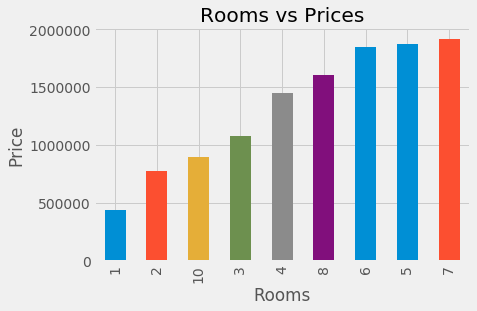

In [251]:
plt.style.use('fivethirtyeight')
new_df.groupby('Rooms')['Price'].mean().sort_values().plot(kind = 'bar')
plt.title('Rooms vs Prices')
plt.xlabel('Rooms')
plt.ylabel('Price')
plt.show()

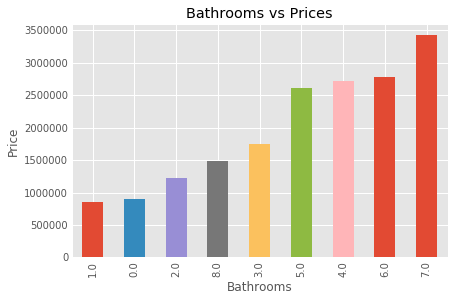

In [252]:
plt.style.use('ggplot')
new_df.groupby('Bathroom')['Price'].mean().sort_values().plot(kind = 'bar')
plt.title('Bathrooms vs Prices')
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.show()

In [253]:
new_df.Car = round(new_df.Car)

C:\Users\bedoe\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


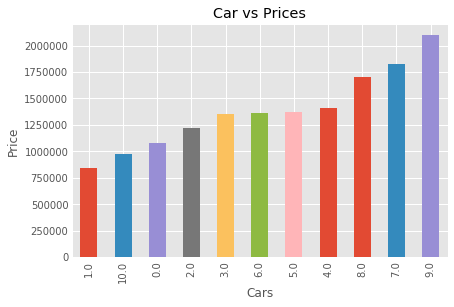

In [254]:
new_df.groupby('Car')['Price'].mean().sort_values().plot(kind = 'bar')

plt.title('Car vs Prices')
plt.xlabel('Cars')
plt.ylabel('Price')
plt.show()

## Model building

In [267]:
new_df = pd.get_dummies(new_df)

In [268]:
y = new_df.Price

In [272]:
X = new_df[:].drop('Price', axis = 1)

In [274]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4)

### XG Boost

In [307]:
model_1 = XGBRegressor(n_estimators = 100)

In [308]:
model_1.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=4, num_parallel_tree=1,
       objective='reg:squarederror', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [309]:
prediction_1 = model_1.predict(X_test)

C:\Users\bedoe\Anaconda3\lib\site-packages\xgboost\data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


In [310]:
mean_absolute_error(y_test, prediction)

274484.6366485641

### RandomForestRegressor

In [311]:
model_2 = RandomForestRegressor()
model_2.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [312]:
prediction_2 = model_2.predict(X_test)

In [313]:
mean_absolute_error(y_test, prediction_2)

280345.76417280314

#### so, XG Boost model is better than RandomForest regarding its MAE 